In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [3]:
df = pd.read_csv('Fraud_check.csv')

### EDA

In [4]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [7]:
df['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [8]:
df['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [9]:
df.rename(columns= {'Taxable.Income':'taxable_income'},inplace=True)

In [10]:
def classify(taxable_income):
    if taxable_income <= 30000:
        return "Risky"
    else:
        return "Good"

In [11]:
df['taxable_income'] = df['taxable_income'].apply(classify)

<AxesSubplot:xlabel='taxable_income', ylabel='count'>

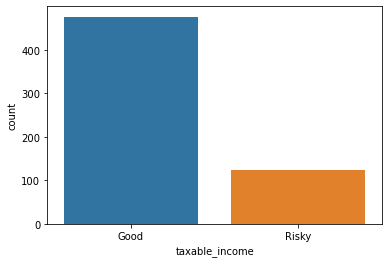

In [12]:
sns.countplot(x=df['taxable_income'])

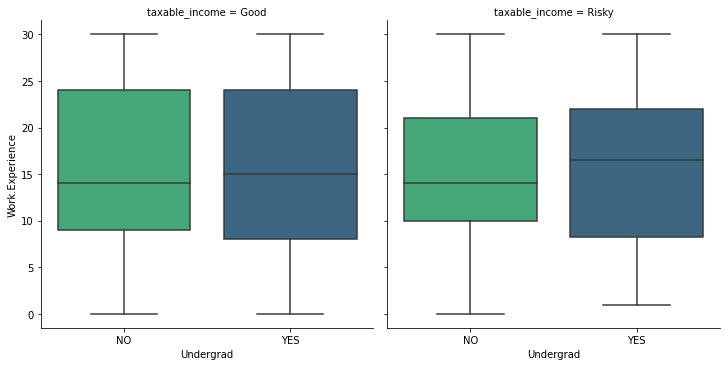

In [13]:
sns.catplot(x='Undergrad',y='Work.Experience',data=df,kind='box',col='taxable_income',palette='viridis_r')

In [14]:
X = pd.get_dummies(data=df.drop('taxable_income',axis=1),drop_first=True)

In [15]:
y = df['taxable_income']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
model=DecisionTreeClassifier(criterion='entropy',)

In [26]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [27]:
confusion_matrix(y_test,y_pred)

array([[107,  30],
       [ 32,  11]], dtype=int64)

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


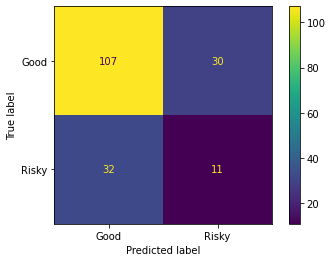

In [28]:
plot_confusion_matrix(model,X_test,y_test)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.77      0.78      0.78       137
       Risky       0.27      0.26      0.26        43

    accuracy                           0.66       180
   macro avg       0.52      0.52      0.52       180
weighted avg       0.65      0.66      0.65       180



In [22]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [23]:
from sklearn.tree import plot_tree

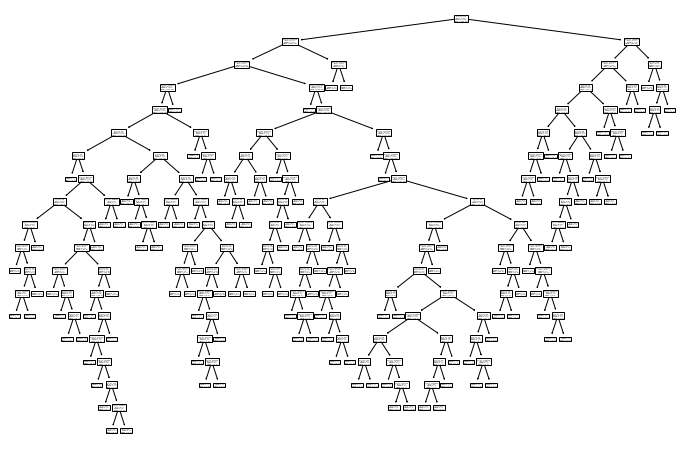

In [24]:
plt.figure(figsize=(12,8))
plot_tree(model);